<a href="https://colab.research.google.com/github/santoshdhalwalkar/EDA/blob/main/edaforrealestate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import drive from google
from google.colab import drive

In [2]:
# mount the drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#import the liabaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
# read the data from google drive
df =pd.read_csv("/content/drive/MyDrive/housing_data.csv")
df

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave   NaN   
1              1       SC20       RL           80     9600   Pave   NaN   
2              2       SC60       RL           68    11250   Pave   NaN   
3              3       SC70       RL           60     9550   Pave   NaN   
4              4       SC60       RL           84    14260   Pave   NaN   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0     No     No          No   
1         Reg         Lvl    AllPub  ...        0     No     No          No   
2         IR1         Lvl    AllPub  ...        0     No     No          No   
3         IR1         Lvl    AllPub  ...        0     No     No          No   
4         IR1         Lvl    AllPub  ...        0     No     No          No   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb   2008        WD         Normal     208500  
1          0    May   2007        WD         Normal     181500  
2          0    Sep   2008        WD         Normal     223500  
3          0    Feb   2006        WD        Abnorml     140000  
4          0    Dec   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [5]:
#drop the unwanted column
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          SC60       RL           65     8450   Pave   NaN      Reg   
1          SC20       RL           80     9600   Pave   NaN      Reg   
2          SC60       RL           68    11250   Pave   NaN      IR1   
3          SC70       RL           60     9550   Pave   NaN      IR1   
4          SC60       RL           84    14260   Pave   NaN      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1455       SC60       RL           62     7917   Pave   NaN      Reg   
1456       SC20       RL           85    13175   Pave   NaN      Reg   
1457       SC70       RL           66     9042   Pave   NaN      Reg   
1458       SC20       RL           68     9717   Pave   NaN      Reg   
1459       SC20       RL           75     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0     No     No          No   
1            Lvl    AllPub       FR2  ...        0     No     No          No   
2            Lvl    AllPub    Inside  ...        0     No     No          No   
3            Lvl    AllPub    Corner  ...        0     No     No          No   
4            Lvl    AllPub       FR2  ...        0     No     No          No   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0     No     No          No   
1456         Lvl    AllPub    Inside  ...        0     No  MnPrv          No   
1457         Lvl    AllPub    Inside  ...        0     No  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0     No     No          No   
1459         Lvl    AllPub    Inside  ...        0     No     No          No   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb    2008        WD         Normal     208500  
1          0    May    2007        WD         Normal     181500  
2          0    Sep    2008        WD         Normal     223500  
3          0    Feb    2006        WD        Abnorml     140000  
4          0    Dec    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0    Aug    2007        WD         Normal     175000  
1456       0    Feb    2010        WD         Normal     210000  
1457    2500    May    2010        WD         Normal     266500  
1458       0    Apr    2010        WD         Normal     142125  
1459       0    Jun    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [6]:
df.shape

(1460, 80)

In [7]:
# summary statistics

df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     57.623288   10516.828082     6.099315     5.575342  1971.267808   
std      34.664304    9981.264932     1.382997     1.112799    30.202904   
min       0.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      42.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      63.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      79.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

In [8]:
# what is the info in my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
# finding null values
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [10]:
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

for column, count in null_counts.items():
    print(f"Column '{column}': {count} null values")

Column 'MSSubClass': 0 null values
Column 'MSZoning': 0 null values
Column 'LotFrontage': 0 null values
Column 'LotArea': 0 null values
Column 'Street': 0 null values
Column 'Alley': 1369 null values
Column 'LotShape': 0 null values
Column 'LandContour': 0 null values
Column 'Utilities': 0 null values
Column 'LotConfig': 0 null values
Column 'LandSlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition1': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'OverallCond': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'Exterior2nd': 0 null values
Column 'MasVnrType': 872 null values
Column 'MasVnrArea': 0 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null valu

In [11]:
# find unique values in label
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [12]:
# drop the label because more than 50% data is null and we have same data in Street and Alley column
df.drop(['Alley', 'MasVnrType'],axis=1, inplace=True)
df

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          SC60       RL           65     8450   Pave      Reg         Lvl   
1          SC20       RL           80     9600   Pave      Reg         Lvl   
2          SC60       RL           68    11250   Pave      IR1         Lvl   
3          SC70       RL           60     9550   Pave      IR1         Lvl   
4          SC60       RL           84    14260   Pave      IR1         Lvl   
...         ...      ...          ...      ...    ...      ...         ...   
1455       SC60       RL           62     7917   Pave      Reg         Lvl   
1456       SC20       RL           85    13175   Pave      Reg         Lvl   
1457       SC70       RL           66     9042   Pave      Reg         Lvl   
1458       SC20       RL           68     9717   Pave      Reg         Lvl   
1459       SC20       RL           75     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... PoolArea PoolQC  Fence MiscFeature  \
0       AllPub    Inside       Gtl  ...        0     No     No          No   
1       AllPub       FR2       Gtl  ...        0     No     No          No   
2       AllPub    Inside       Gtl  ...        0     No     No          No   
3       AllPub    Corner       Gtl  ...        0     No     No          No   
4       AllPub       FR2       Gtl  ...        0     No     No          No   
...        ...       ...       ...  ...      ...    ...    ...         ...   
1455    AllPub    Inside       Gtl  ...        0     No     No          No   
1456    AllPub    Inside       Gtl  ...        0     No  MnPrv          No   
1457    AllPub    Inside       Gtl  ...        0     No  GdPrv        Shed   
1458    AllPub    Inside       Gtl  ...        0     No     No          No   
1459    AllPub    Inside       Gtl  ...        0     No     No          No   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0          0     Feb    2008        WD         Normal    208500  
1          0     May    2007        WD         Normal    181500  
2          0     Sep    2008        WD         Normal    223500  
3          0     Feb    2006        WD        Abnorml    140000  
4          0     Dec    2008        WD         Normal    250000  
...      ...     ...     ...       ...            ...       ...  
1455       0     Aug    2007        WD         Normal    175000  
1456       0     Feb    2010        WD         Normal    210000  
1457    2500     May    2010        WD         Normal    266500  
1458       0     Apr    2010        WD         Normal    142125  
1459       0     Jun    2008        WD         Normal    147500  

[1460 rows x 78 columns]

In [13]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [14]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [15]:
# Find the mode for categorical data
mode=df['Electrical'].mode()[0]  # to find the means of the column
mode

'SBrkr'

In [16]:
#fill the null values with mode
df['Electrical'].fillna(value=mode, inplace=True)


In [17]:
# Find the mean Values
mean=df['GarageYrBlt'].mean()  # to find the means of the column
mean



1978.5061638868744

In [18]:
# Find the nmedian values
md=df['GarageYrBlt'].median()  # to find the median of the column
md

1980.0

In [19]:
# replace the with the median values

df['GarageYrBlt'].fillna(value=md, inplace=True)

In [20]:
# what is the info in my data after replacing null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [21]:
# Transpose  the data have a different look at the data
df.head().T

0       1       2        3       4
MSSubClass       SC60    SC20    SC60     SC70    SC60
MSZoning           RL      RL      RL       RL      RL
LotFrontage        65      80      68       60      84
LotArea          8450    9600   11250     9550   14260
Street           Pave    Pave    Pave     Pave    Pave
...               ...     ...     ...      ...     ...
MoSold            Feb     May     Sep      Feb     Dec
YrSold           2008    2007    2008     2006    2008
SaleType           WD      WD      WD       WD      WD
SaleCondition  Normal  Normal  Normal  Abnorml  Normal
SalePrice      208500  181500  223500   140000  250000

[78 rows x 5 columns]

In [22]:
df = df.drop_duplicates()
df.count()

MSSubClass       1460
MSZoning         1460
LotFrontage      1460
LotArea          1460
Street           1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 78, dtype: int64

In [23]:
# find and print null values
null_values = df.isnull()
null_counts = null_values.sum()
null_counts

for column, count in null_counts.items():
    print(f"Column '{column}': {count} null values")

Column 'MSSubClass': 0 null values
Column 'MSZoning': 0 null values
Column 'LotFrontage': 0 null values
Column 'LotArea': 0 null values
Column 'Street': 0 null values
Column 'LotShape': 0 null values
Column 'LandContour': 0 null values
Column 'Utilities': 0 null values
Column 'LotConfig': 0 null values
Column 'LandSlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition1': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'OverallCond': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'Exterior2nd': 0 null values
Column 'MasVnrArea': 0 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null values
Column 'BsmtQual': 0 null values
Column 'BsmtCond': 0 null values
C

In [24]:
# indentify numberical and categorical data
num_columns = df.select_dtypes(include=['number']).columns.to_list()
cat_columns = df.select_dtypes(include=['object']).columns.to_list()

In [25]:
num_columns

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [26]:
cat_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [27]:
# convert object data into int format
# df= pd.get_dummies(df, columns=['MSSubClass', 'MSZoning',  'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
#  'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#  'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
#  'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],  dtype=int)

In [28]:
!pip install scikit-learn

In [29]:
# import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

In [30]:
# Select only the categorical ordinal columns
categorical_ordcolumns = ['LotShape', 'LandSlope', 'BldgType', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual', 'FireplaceQu',
                   'GarageFinish','GarageQual', 'GarageCond', 'PoolQC','Fence']
encoder = OrdinalEncoder()



# Fit the encoder to the categorical columns
encoder.fit(df[categorical_ordcolumns])



df[categorical_ordcolumns] = encoder.transform(df[categorical_ordcolumns])

df




MSSubClass MSZoning  LotFrontage  LotArea Street  LotShape LandContour  \
0          SC60       RL           65     8450   Pave       3.0         Lvl   
1          SC20       RL           80     9600   Pave       3.0         Lvl   
2          SC60       RL           68    11250   Pave       0.0         Lvl   
3          SC70       RL           60     9550   Pave       0.0         Lvl   
4          SC60       RL           84    14260   Pave       0.0         Lvl   
...         ...      ...          ...      ...    ...       ...         ...   
1455       SC60       RL           62     7917   Pave       3.0         Lvl   
1456       SC20       RL           85    13175   Pave       3.0         Lvl   
1457       SC70       RL           66     9042   Pave       3.0         Lvl   
1458       SC20       RL           68     9717   Pave       3.0         Lvl   
1459       SC20       RL           75     9937   Pave       3.0         Lvl   

     Utilities LotConfig  LandSlope  ... PoolArea PoolQC Fence  MiscFeature  \
0       AllPub    Inside        0.0  ...        0    3.0   4.0           No   
1       AllPub       FR2        0.0  ...        0    3.0   4.0           No   
2       AllPub    Inside        0.0  ...        0    3.0   4.0           No   
3       AllPub    Corner        0.0  ...        0    3.0   4.0           No   
4       AllPub       FR2        0.0  ...        0    3.0   4.0           No   
...        ...       ...        ...  ...      ...    ...   ...          ...   
1455    AllPub    Inside        0.0  ...        0    3.0   4.0           No   
1456    AllPub    Inside        0.0  ...        0    3.0   2.0           No   
1457    AllPub    Inside        0.0  ...        0    3.0   0.0         Shed   
1458    AllPub    Inside        0.0  ...        0    3.0   4.0           No   
1459    AllPub    Inside        0.0  ...        0    3.0   4.0           No   

     MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0          0     Feb    2008        WD         Normal    208500  
1          0     May    2007        WD         Normal    181500  
2          0     Sep    2008        WD         Normal    223500  
3          0     Feb    2006        WD        Abnorml    140000  
4          0     Dec    2008        WD         Normal    250000  
...      ...     ...     ...       ...            ...       ...  
1455       0     Aug    2007        WD         Normal    175000  
1456       0     Feb    2010        WD         Normal    210000  
1457    2500     May    2010        WD         Normal    266500  
1458       0     Apr    2010        WD         Normal    142125  
1459       0     Jun    2008        WD         Normal    147500  

[1460 rows x 78 columns]

In [31]:
# To find nominal catgorical columns
cat_nominalcolumns = df.select_dtypes(include=['object']).columns.to_list()
cat_nominalcolumns


['MSSubClass',
 'MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [32]:
# convert nominal categorical  data into int format
df = pd.get_dummies(data=df,  columns=['MSSubClass', 'MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
   'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],  dtype=int)

In [33]:
df

LotFrontage  LotArea  LotShape  LandSlope  BldgType  OverallQual  \
0              65     8450       3.0        0.0       0.0          6.0   
1              80     9600       3.0        0.0       0.0          5.0   
2              68    11250       0.0        0.0       0.0          6.0   
3              60     9550       0.0        0.0       0.0          6.0   
4              84    14260       0.0        0.0       0.0          7.0   
...           ...      ...       ...        ...       ...          ...   
1455           62     7917       3.0        0.0       0.0          5.0   
1456           85    13175       3.0        0.0       0.0          5.0   
1457           66     9042       3.0        0.0       0.0          6.0   
1458           68     9717       3.0        0.0       0.0          4.0   
1459           75     9937       3.0        0.0       0.0          4.0   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  SaleType_ConLw  \
0             4.0       2003          2003         196  ...               0   
1             7.0       1976          1976           0  ...               0   
2             4.0       2001          2002         162  ...               0   
3             4.0       1915          1970           0  ...               0   
4             4.0       2000          2000         350  ...               0   
...           ...        ...           ...         ...  ...             ...   
1455          4.0       1999          2000           0  ...               0   
1456          5.0       1978          1988         119  ...               0   
1457          8.0       1941          2006           0  ...               0   
1458          5.0       1950          1996           0  ...               0   
1459          5.0       1965          1965           0  ...               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      1   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1            

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 253 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(20), int64(233)
memory usage: 2.8 MB


In [35]:
# count the duplicate data
duplicate = df.duplicated()
duplicate.sum()

0

In [36]:
df.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'LandSlope', 'BldgType',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

In [37]:
# Renaming columns
df = df.rename(columns={
    'LotFrontage': 'PropertFrontage',
    'LotArea': 'PropertyArea',
    'LotShape': 'PropertyShape',
    'LandSlope': 'PropertySlope',
    'BldgType': 'BuildingType'
})



In [38]:
df.columns

Index(['PropertFrontage', 'PropertyArea', 'PropertyShape', 'PropertySlope',
       'BuildingType', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

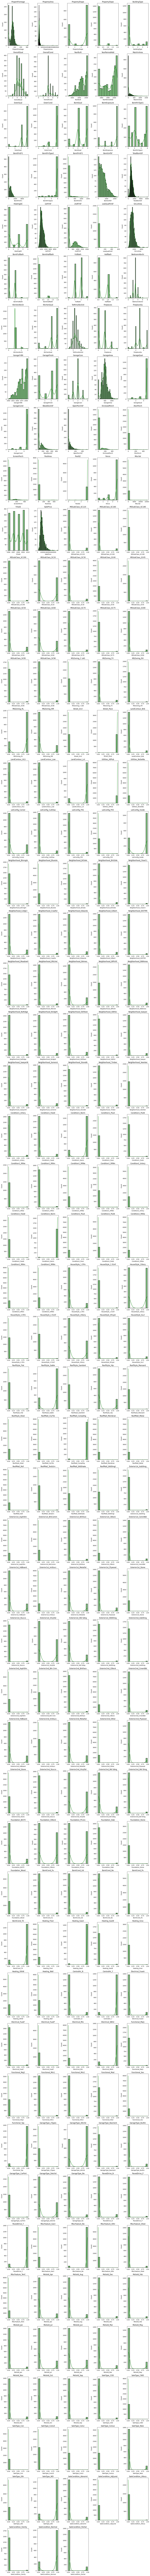

In [39]:

import math

# Filter for columns with int and float data types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Number of columns per row
cols_per_row = 5

# Calculate the number of rows needed
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 5 * num_rows))

# Flatten axes array to make indexing easier
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df[col], kde=True, color="green", edgecolor='black', linewidth=1.5, ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

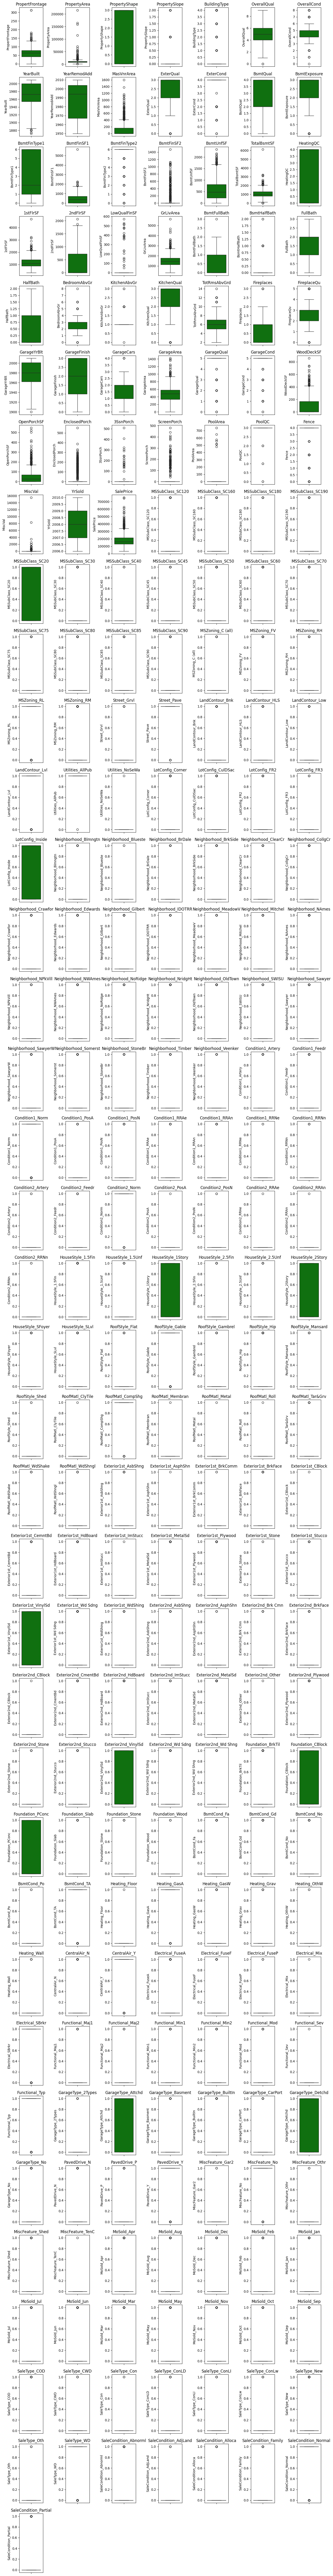

In [40]:

# Filter for columns with int and float data types
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Number of columns per row
cols_per_row = 7

# Calculate the number of rows needed
num_cols = len(numeric_cols)
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(14,3 * num_rows))

# Flatten axes array to make indexing easier
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color="green")
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [41]:
df.columns

Index(['PropertFrontage', 'PropertyArea', 'PropertyShape', 'PropertySlope',
       'BuildingType', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

In [42]:
def iqr_tech(DfColumn):
  Q1= np.percentile(DfColumn, 25)
  Q3= np.percentile(DfColumn, 75)
  IQR= Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [43]:
lower_range, upper_range = iqr_tech(df['PropertFrontage'])
df = df[(df.PropertFrontage > lower_range ) & (df.PropertFrontage < upper_range )]
print("NEw Shape: ", df.shape)

NEw Shape:  (1444, 253)


In [44]:
print("Old Shape: ", df.shape)

lower_range, upper_range = iqr_tech(df['PropertyArea'])
df = df[(df.PropertyArea > lower_range ) & (df.PropertyArea < upper_range )]

print("NEw Shape: ", df.shape)

Old Shape:  (1444, 253)
NEw Shape:  (1375, 253)


In [45]:
print("Old Shape: ", df.shape)

lower_range, upper_range = iqr_tech(df['PropertyArea'])
df = df[(df.PropertyArea > lower_range ) & (df.PropertyArea < upper_range )]

print("NEw Shape: ", df.shape)

Old Shape:  (1375, 253)
NEw Shape:  (1356, 253)


In [46]:
column_names = df.columns.tolist()
print(column_names)

['PropertFrontage', 'PropertyArea', 'PropertyShape', 'PropertySlope', 'BuildingType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'YrSold', 'SalePrice', 'MSSubClass_SC120', 'MSSubClass_SC160', 'MSSubClass_SC180', 'MSSubClass_SC190', 'MSSubClass_SC20', 'MSSubClass_SC30', 'MSSubClass_SC40', 'MSSubClass_SC45', 'MSSubClass_SC50', 'MSSubClass_SC60', 'MSSubClass_SC70', 'MSSubClass_SC75', 'MSSubClass_SC80', 'MSSubCl

In [47]:
df

PropertFrontage  PropertyArea  PropertyShape  PropertySlope  \
0                  65          8450            3.0            0.0   
1                  80          9600            3.0            0.0   
2                  68         11250            0.0            0.0   
3                  60          9550            0.0            0.0   
4                  84         14260            0.0            0.0   
...               ...           ...            ...            ...   
1455               62          7917            3.0            0.0   
1456               85         13175            3.0            0.0   
1457               66          9042            3.0            0.0   
1458               68          9717            3.0            0.0   
1459               75          9937            3.0            0.0   

      BuildingType  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0              0.0          6.0          4.0       2003          2003   
1              0.0          5.0          7.0       1976          1976   
2              0.0          6.0          4.0       2001          2002   
3              0.0          6.0          4.0       1915          1970   
4              0.0          7.0          4.0       2000          2000   
...            ...          ...          ...        ...           ...   
1455           0.0          5.0          4.0       1999          2000   
1456           0.0          5.0          5.0       1978          1988   
1457           0.0          6.0          8.0       1941          2006   
1458           0.0          4.0          5.0       1950          1996   
1459           0.0          4.0          5.0       1965          1965   

      MasVnrArea  ...  SaleType_ConLw  SaleType_New  SaleType_Oth  \
0            196  ...               0             0             0   
1              0  ...               0             0             0   
2            162  ...               0             0             0   
3              0  ...               0             0             0   
4            350  ...               0             0             0   
...          ...  ...             ...           ...           ...   
1455           0  ...               0             0             0   
1456         119  ...               0             0             0   
1457           0  ...               0             0             0   
1458           0  ...               0             0             0   
1459           0  ...               0             0             0   

      SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0               1                      0                      0   
1               1                      0                      0   
2               1                      0                      0   
3               1                      1                      0   
4               1                      0                      0   
...           ...                    ...                    ...   
1455            1                      0                      0   
1456            1                      0                      0   
1457            1                      0                      0   
1458            1                      0                      0   
1459            1                      0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     1   
...                    ...                   ...                   ...   
1455                     0                     0                     1   
1456                     0                     0                     1   


In [48]:
df.rename(columns={'1stFlrSF': 'FirstFloorSquareFeet', '2ndFlrSF':'SecondFloorSquareFeet', '3SsnPorch':'ThirdSsnPorch',}, inplace=True)

In [49]:
# Function to remove outliers
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of columns to remove outliers from
columns = ['PropertyShape', 'PropertySlope', 'BuildingType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'FirstFloorSquareFeet', 'SecondFloorSquareFeet', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'YrSold', 'SalePrice', 'MSSubClass_SC120', 'MSSubClass_SC160', 'MSSubClass_SC180', 'MSSubClass_SC190', 'MSSubClass_SC20', 'MSSubClass_SC30', 'MSSubClass_SC40', 'MSSubClass_SC45', 'MSSubClass_SC50', 'MSSubClass_SC60', 'MSSubClass_SC70', 'MSSubClass_SC75', 'MSSubClass_SC80', 'MSSubClass_SC85', 'MSSubClass_SC90', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_No', 'BsmtCond_Po', 'BsmtCond_TA', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_No', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'MiscFeature_Gar2', 'MiscFeature_No', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'MoSold_Apr', 'MoSold_Aug', 'MoSold_Dec', 'MoSold_Feb', 'MoSold_Jan', 'MoSold_Jul', 'MoSold_Jun', 'MoSold_Mar', 'MoSold_May', 'MoSold_Nov', 'MoSold_Oct', 'MoSold_Sep', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']

# Remove outliers
df_cleaned = remove_outliers(df, columns)

print(df_cleaned)

      PropertFrontage  PropertyArea  PropertyShape  PropertySlope  \
2                  68         11250            0.0            0.0   
143                78         10335            0.0            0.0   
248                72         11317            3.0            0.0   
506                80          9554            0.0            0.0   
590                64          8320            3.0            0.0   
604                88         12803            0.0            0.0   
782                67         16285            1.0            0.0   
838                75          9525            3.0            0.0   
871                70          8750            3.0            0.0   
1082               70          8749            3.0            0.0   
1133               80          9828            0.0            0.0   
1198               70          9100            3.0            0.0   
1410               79         12420            3.0            0.0   

      BuildingType  OverallQual  

In [50]:
df_cleaned.shape


(13, 253)

In [51]:
column_names = df_cleaned.columns.tolist()
print(column_names)

['PropertFrontage', 'PropertyArea', 'PropertyShape', 'PropertySlope', 'BuildingType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'FirstFloorSquareFeet', 'SecondFloorSquareFeet', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'YrSold', 'SalePrice', 'MSSubClass_SC120', 'MSSubClass_SC160', 'MSSubClass_SC180', 'MSSubClass_SC190', 'MSSubClass_SC20', 'MSSubClass_SC30', 'MSSubClass_SC40', 'MSSubClass_SC45', 'MSSubClass_SC50', 'MSSubClass_SC60', 'MSSubClass_SC70', 'MSSubClass_SC75'

In [52]:
df_cleaned

PropertFrontage  PropertyArea  PropertyShape  PropertySlope  \
2                  68         11250            0.0            0.0   
143                78         10335            0.0            0.0   
248                72         11317            3.0            0.0   
506                80          9554            0.0            0.0   
590                64          8320            3.0            0.0   
604                88         12803            0.0            0.0   
782                67         16285            1.0            0.0   
838                75          9525            3.0            0.0   
871                70          8750            3.0            0.0   
1082               70          8749            3.0            0.0   
1133               80          9828            0.0            0.0   
1198               70          9100            3.0            0.0   
1410               79         12420            3.0            0.0   

      BuildingType  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
2              0.0          6.0          4.0       2001          2002   
143            0.0          6.0          4.0       1999          1999   
248            0.0          6.0          4.0       2003          2003   
506            0.0          7.0          4.0       1993          1994   
590            0.0          6.0          4.0       2004          2004   
604            0.0          6.0          4.0       2002          2002   
782            0.0          6.0          4.0       2001          2002   
838            0.0          4.0          5.0       1995          2006   
871            0.0          5.0          4.0       1998          1998   
1082           0.0          6.0          4.0       2002          2002   
1133           0.0          7.0          4.0       1995          1995   
1198           0.0          6.0          4.0       2001          2001   
1410           0.0          6.0          4.0       2001          2001   

      MasVnrArea  ...  SaleType_ConLw  SaleType_New  SaleType_Oth  \
2            162  ...               0             0             0   
143          183  ...               0             0             0   
248          101  ...               0             0             0   
506          125  ...               0             0             0   
590            0  ...               0             0             0   
604           99  ...               0             0             0   
782            0  ...               0             0             0   
838            0  ...               0             0             0   
871          116  ...               0             0             0   
1082         100  ...               0             0             0   
1133           0  ...               0             0             0   
1198           0  ...               0             0             0   
1410           0  ...               0             0             0   

      SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
2               1                      0                      0   
143             1                      0                      0   
248             1                      0                      0   
506             1                      0                      0   
590             1                      0                      0   
604             1                      0                      0   
782             1                      0                      0   
838             1                      0                      0   
871             1                      0                      0   
1082            1                      0                      0   
1133            1                      0                      0   
1198            1                      0                      0   
1410            1                      0                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
2                        0          

(13, 253)


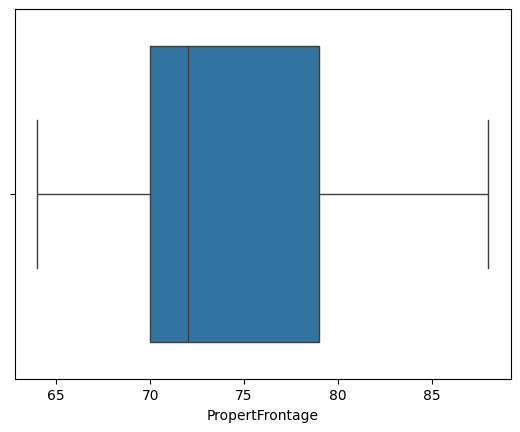

In [53]:
# Check that the outliers are removed.
sns.boxplot(x = df_cleaned['PropertFrontage'])
print(df_cleaned.shape)

In [54]:
print(df_cleaned['SalePrice'].max())

239500


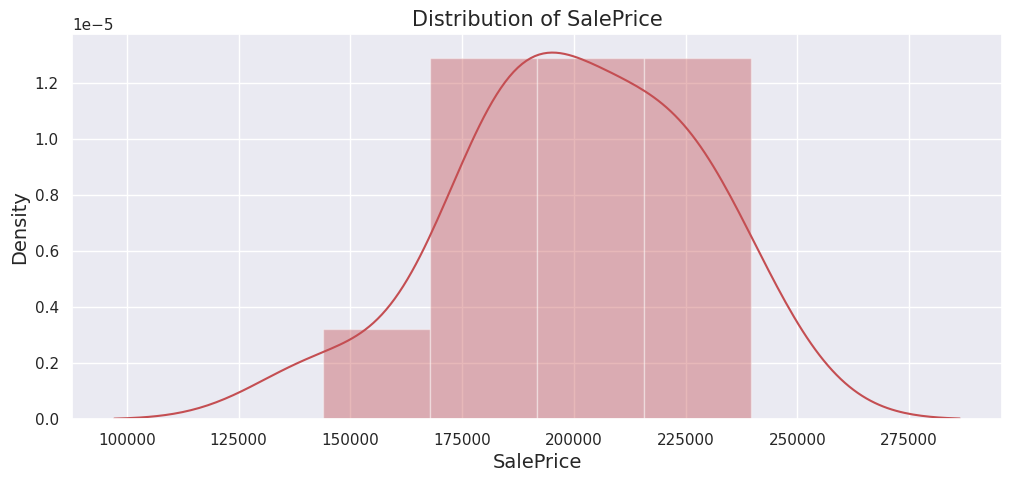

In [55]:
# Distribution of the SalePrice
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.distplot(df_cleaned['SalePrice'], color=('r'))
plt.xlabel("SalePrice", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of SalePrice", fontsize = 15)
plt.show()

In [56]:
# Try find new features called HouseAge, Yearsinceremodel and TotalSF
df_cleaned['HouseAge'] = df_cleaned['YrSold'] - df_cleaned['YearBuilt']
df_cleaned['YearsSinceRemodel'] = df_cleaned['YrSold'] - df_cleaned['YearRemodAdd']


df_cleaned['TotalSF'] = df_cleaned['TotalBsmtSF'] + df_cleaned['FirstFloorSquareFeet'] + df_cleaned['SecondFloorSquareFeet']


In [57]:
print(df_cleaned.head())

     PropertFrontage  PropertyArea  PropertyShape  PropertySlope  \
2                 68         11250            0.0            0.0   
143               78         10335            0.0            0.0   
248               72         11317            3.0            0.0   
506               80          9554            0.0            0.0   
590               64          8320            3.0            0.0   

     BuildingType  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
2             0.0          6.0          4.0       2001          2002   
143           0.0          6.0          4.0       1999          1999   
248           0.0          6.0          4.0       2003          2003   
506           0.0          7.0          4.0       1993          1994   
590           0.0          6.0          4.0       2004          2004   

     MasVnrArea  ...  SaleType_WD  SaleCondition_Abnorml  \
2           162  ...            1                      0   
143         183  ...            1     

In [58]:
df_cleane

NameError: name 'df_cleane' is not defined

In [ ]:
# Separate features and target variable

X = df_cleaned.drop('SalePrice', axis=1)
X



In [ ]:
y = df_cleaned['SalePrice']
y

In [ ]:
# Optionally, split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=45)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model

In [ ]:
# train model on training data
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_train)
y_pred

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(y_train, y_pred)
print("R-squared:", r_squared)

In [ ]:
z_pred = model.predict(X_test)
z_pred

In [ ]:
r_squared1 = r2_score(y_test, z_pred)
print("R-squared:", r_squared1)